## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático

 
### Quiz 02 


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual

---

Resumen: En el presente quiz se realizarán ejercicios para repasar algunos conceptos sobre proyectos de clasificación binaria utilizando Python y PyTorch.

---



**Ejercicio. Realice un análisis comparativo de resultados de clasificación binaria utilizando los algoritmos perceptrón multicapa, árboles de decisión y bosques aleatorios**

Se le proporciona el archivo diabetes.csv, en el cual las primeras 8 columnas corresponden a $X$ y la última columna a $y$ ---o atributo de clase (Outcome)---.

***Datos para el ejercicio***
* Fuente: https://www.kaggle.com/uciml/pima-indians-diabetes-database
* Descripción textual:
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Columns:
    * Pregnancies: Number of times pregnant
    * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * BloodPressure: Diastolic blood pressure
    * SkinThickness: Triceps skin fold thickness
    * Insulin: 2-Hour serum insulin
    * BMI: Body mass index
    * DiabetesPedigreeFunction: Diabetes pedigree function
    * Age: Age
    * Outcome: Class variable (0 or 1)

Realice lo siguiente:

**1. Preprocesamiento**
- a) (1 punto) Describa el conjunto de datos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore el conjunto de datos, visualice algunas estadísticas, limpie el conjunto de datos y verifique que no existan valores faltantes.
- d) (2 puntos) Escale los datos.
- e) (1 punto) Separe los datos en datos de entrenamiento y evaluación (80/20% respectivamente).

**2. Generación y evaluación de modelos**

**Árboles de decisión**
- f) (2 puntos) Utilice árboles de decisión para resolver el problema de clasificación binaria.
- g) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo. 
- h) (5 puntos) Realice el ejercicio con al menos 5 niveles diferentes de profundidad de árboles (max_depth) y recomiende cuál es la mejor configuración para este parámetro.
- i) (3 puntos) Imprima el árbol con la profundidad que genera el mejor desempeño, explique la estructura del árbol (sobre todo qué significan las hojas) y clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31) explique la ruta que siguió en el árbol y el resultado obtenido. Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).


**Random Forest**
- j) (2 puntos) Aplique el algoritmo de Random Forest al ejercicio de clasificación binaria.
- k) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo.
- l) (5 puntos) Realice el ejercicio con al menos 5 cantidades diferentes de estimadores (n_estimators) y recomiende cuál es la mejor configuración para este parámetro.

**(10% extra) Perceptron multicapa con PyTorch**
- m) (5%) Defina un modelo utilizando una **red profunda de perceptrón multicapa** implementada con PyTorch.
- n) (3%) Realice el entrenamiento del modelo. Aún no vamos a utilizar la curva de error para ajustar las épocas del entrenamiento del modelo apropiadamente por lo que inicialmente pueden usar un valor que ustedes consideren conveniente.
- ñ)(1%) Calcule la exactitud (accuracy) del modelo.
- o) (1%) Clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31). Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).


**3. Análisis comparativo de resultados**

 p) (4 puntos) Genere al menos cuatro conclusiones al respecto de los resultados del ejercicio (incluya comparaciones de resultados entre modelos).

 

---

**1. Preprocesamiento**
- a) (1 punto) Describa el conjunto de datos y referencie la fuente. 

* Columns:
    * Pregnancies: Number of times pregnant
    * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * BloodPressure: Diastolic blood pressure
    * SkinThickness: Triceps skin fold thickness
    * Insulin: 2-Hour serum insulin
    * BMI: Body mass index
    * DiabetesPedigreeFunction: Diabetes pedigree function
    * Age: Age
    * Outcome: Class variable (0 or 1)

    * Fuente: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
# - b) Cargue el conjunto de datos.

import pandas as pd
file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\diabetes.csv'

Diabetes_df = pd.read_csv(file_path)

Diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 #- c) (2 puntos) Explore el conjunto de datos, visualice algunas estadísticas, limpie el conjunto de datos y verifique que no existan valores faltantes.

In [4]:
# Aplicar funcion describe para entender algunos valroes estadisticos del Data set

Diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
Diabetes_df.shape

(768, 9)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


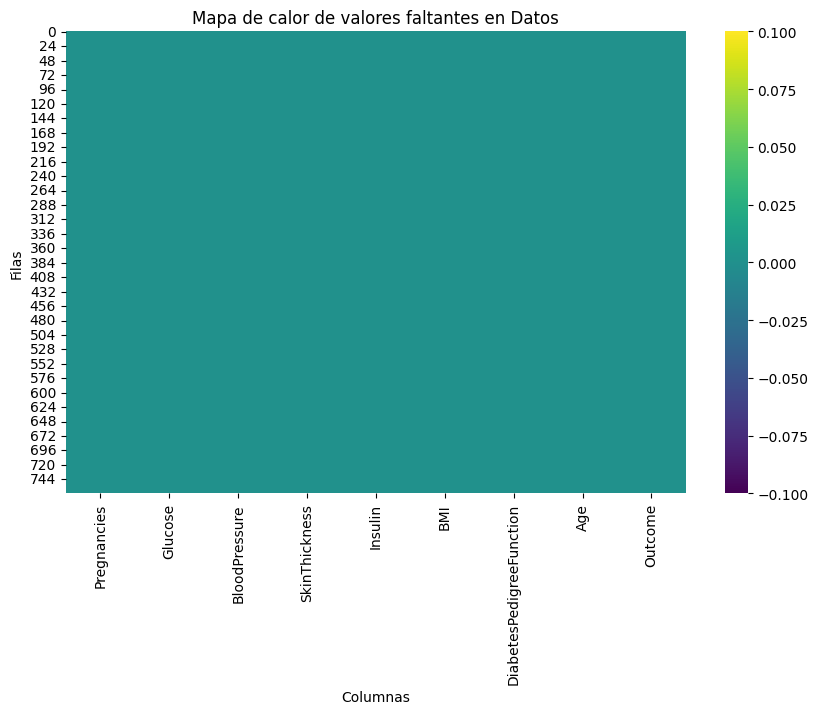

In [3]:
# Visualizar y contar datos faltantes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los datos faltantes por columna
datos_faltantes = Diabetes_df.isnull().sum()

# Imprimir el resultado
print(datos_faltantes)

# Crear el mapa de calor de los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(Diabetes_df.isnull(), cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Mapa de calor de valores faltantes en Datos')
plt.show()


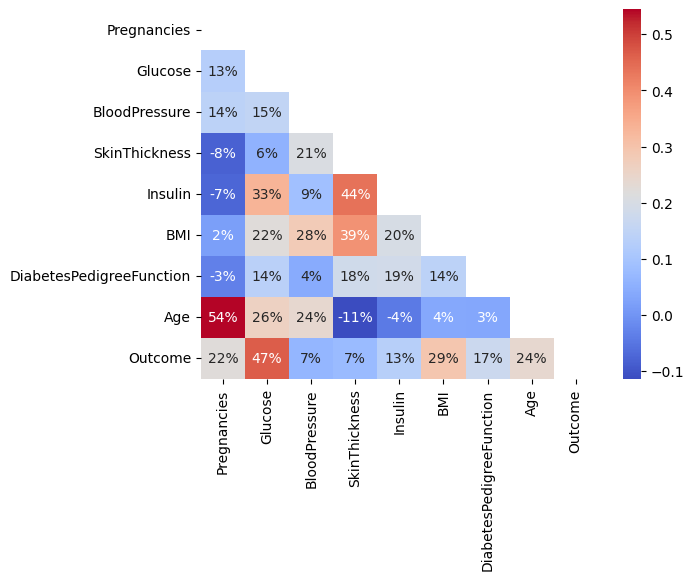

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

matrix = Diabetes_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, fmt=".0%", mask=mask, cmap='coolwarm')

# Display the plot
plt.show()

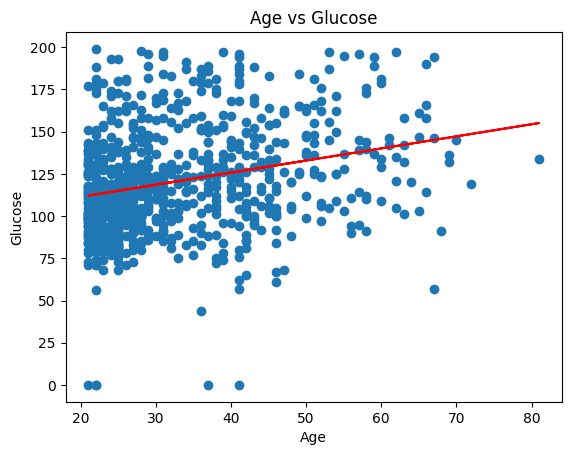

In [9]:
from sklearn.linear_model import LinearRegression

def plot_scatter_plot(x, y, x_label='X', y_label='Y', title='Scatter Plot'):


  model = LinearRegression()
  model.fit(x, y)


  y_pred = model.predict(x)

  plt.scatter(x, y)


  plt.plot(x, y_pred, color='red')


  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.show()

plot_scatter_plot(Diabetes_df['Age'].values.reshape(-1, 1), Diabetes_df['Glucose'].values.reshape(-1, 1), 'Age', 'Glucose', 'Age vs Glucose')

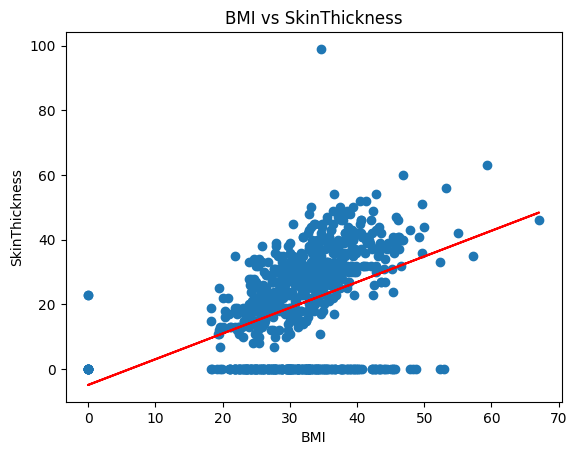

In [10]:
plot_scatter_plot(Diabetes_df['BMI'].values.reshape(-1, 1), Diabetes_df['SkinThickness'].values.reshape(-1, 1), 'BMI', 'SkinThickness', 'BMI vs SkinThickness')

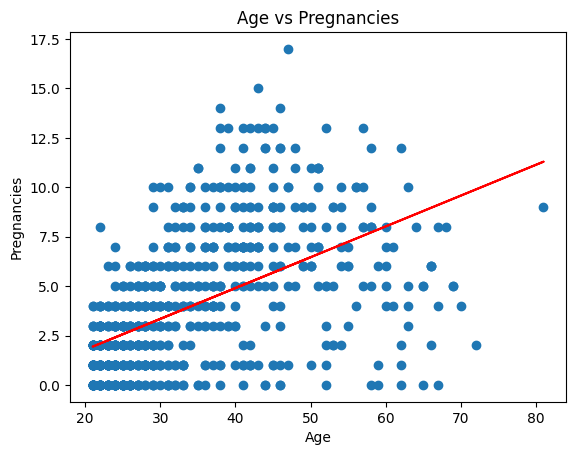

In [11]:
plot_scatter_plot(Diabetes_df['Age'].values.reshape(-1, 1), Diabetes_df['Pregnancies'].values.reshape(-1, 1), 'Age', 'Pregnancies', 'Age vs Pregnancies')

In [12]:
# - d) (2 puntos) Escale los datos.


from sklearn import preprocessing

Datos_Escalados = preprocessing.scale(Diabetes_df)

scaled_df = pd.DataFrame(Datos_Escalados, columns=Diabetes_df.columns)

Diabetes_df.iloc[:, :] = scaled_df.values

print('Datos escalados')
Diabetes_df.std(axis=0)

Datos escalados


Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
Outcome                     1.000652
dtype: float64

In [15]:
# - e) (1 punto) Separe los datos en datos de entrenamiento y evaluación (80/20% respectivamente).

from sklearn.model_selection import train_test_split

X = Diabetes_df.drop('Outcome', axis=1) 
y = Diabetes_df['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y evaluación
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)



Forma de X_train: (614, 8)
Forma de X_test: (154, 8)
Forma de y_train: (614,)
Forma de y_test: (154,)


 **2. Generación y evaluación de modelos**

 **Árboles de decisión**

In [20]:
Diabetes_df.shape

(768, 9)

In [23]:
# - f) (2 puntos) Utilice árboles de decisión para resolver el problema de clasificación binaria.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

adr = DecisionTreeRegressor(max_depth = 5)

# Se entrena el modelo
adr.fit(X_train, y_train)

# Se realiza una predicción
Y_pred = adr.predict(X_test)

Y_pred

array([ 0.15881814, -0.56015167, -0.73212021, -0.73212021, -0.73212021,
        0.15881814, -0.73212021,  0.8244724 ,  0.5888529 ,  0.5888529 ,
        0.15881814,  0.91632103,  1.36589591,  0.8244724 , -0.73212021,
       -0.176763  , -0.56015167, -0.73212021,  0.14205317,  0.05463584,
        0.15881814, -0.58742944,  0.15881814, -0.56015167,  0.5888529 ,
        1.36589591, -0.73212021, -0.73212021, -0.56015167, -0.58742944,
        0.05463584,  1.04801468,  0.91632103,  1.36589591,  0.8244724 ,
        1.04801468,  1.36589591,  0.8244724 ,  0.15881814,  1.36589591,
       -0.73212021,  1.36589591,  0.8244724 ,  0.15881814, -0.73212021,
        0.05463584,  0.8244724 , -0.56015167, -0.73212021,  1.36589591,
       -0.73212021,  1.04801468,  1.04801468, -0.36188207, -0.73212021,
       -0.73212021, -0.73212021, -0.73212021, -0.176763  ,  0.91632103,
        1.04801468, -0.56015167, -0.36188207, -0.58742944, -0.56015167,
        0.05463584, -0.73212021,  0.5888529 , -0.73212021,  1.36

In [25]:
 # - g) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo.

import numpy as np
from sklearn.model_selection import cross_val_score


adr = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(adr, X, y, cv=5, scoring='r2')
mean_accuracy = np.mean(scores)

print("Exactitud promedio:", mean_accuracy)


Exactitud promedio: 0.16974712282996943


In [28]:
# - h) (5 puntos) Realice el ejercicio con al menos 5 niveles diferentes de profundidad de árboles (max_depth) y recomiende cuál es la mejor configuración para este parámetro.

import numpy as np
from sklearn.model_selection import cross_val_score

depths = [2, 4, 6, 8, 10]
mean_r2_scores = []

for depth in depths:
    
    adr = DecisionTreeRegressor(max_depth=depth)
    r2_scores = cross_val_score(adr, X, y, cv=5, scoring='r2')
    mean_r2_score = np.mean(r2_scores)
    mean_r2_scores.append(mean_r2_score)

# Encontrar el índice del máximo valor de coeficiente de determinación R²
best_depth_index = np.argmax(mean_r2_scores)

# Obtener el mejor nivel de profundidad y su coeficiente de determinación R² correspondiente
best_depth = depths[best_depth_index]
best_r2_score = mean_r2_scores[best_depth_index]

print("Mejor nivel de profundidad:", best_depth)
print("Coeficiente de determinación R² correspondiente:", best_r2_score)



Mejor nivel de profundidad: 2
Coeficiente de determinación R² correspondiente: 0.22112040603546895


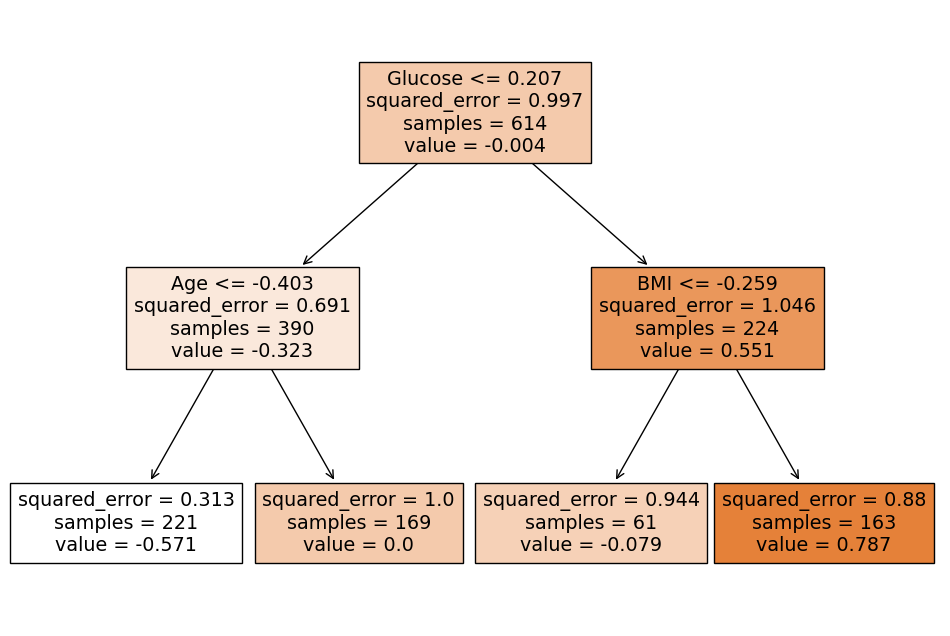

Resultado de la clasificación: [0.78668901]


C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [31]:
# - i) (3 puntos) Imprima el árbol con la profundidad que genera el mejor desempeño, explique la estructura del árbol (sobre todo qué significan las hojas) y clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31) explique la ruta que siguió en el árbol y el resultado obtenido. Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

regressor = DecisionTreeRegressor(max_depth=best_depth)

# Entrenar el modelo con todos los datos de entrenamiento
regressor.fit(X_train, y_train)

# Imprimir la estructura del árbol
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], filled=True)
plt.show()

# Clasificar la muestra de prueba
sample = [[0, 118, 84, 47, 230, 45.8, 0.551, 31]]
prediction = regressor.predict(sample)

print("Resultado de la clasificación:", prediction)



**Random Forest**

In [32]:
# - j) (2 puntos) Aplique el algoritmo de Random Forest al ejercicio de clasificación binaria.

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
     random_state=0)

clf = DecisionTreeClassifier(max_depth=None, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(n_estimators=50, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.9823000000000001
1.0


In [34]:
# - k) (2 puntos) Utilice validación cruzada para evaluar la exactitud (accuracy) del modelo.

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calcula y muestra la exactitud promedio
mean_accuracy = np.mean(scores)
print("Exactitud promedio (R2):", mean_accuracy)


Exactitud promedio (R2): 0.83982660140694


In [35]:
# - l) (5 puntos) Realice el ejercicio con al menos 5 cantidades diferentes de estimadores (n_estimators) y recomiende cuál es la mejor configuración para este parámetro.

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
n_estimators_list = [50, 100, 150, 200, 250]
scores_dict = {}

for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_accuracy = np.mean(scores)
    scores_dict[n_estimators] = mean_accuracy

# Imprime los puntajes de R2 para cada valor de n_estimators
for n_estimators, score in scores_dict.items():
    print("n_estimators:", n_estimators, "| Exactitud promedio (R2):", score)


n_estimators: 50 | Exactitud promedio (R2): 0.8377799367022568
n_estimators: 100 | Exactitud promedio (R2): 0.8372753256916804
n_estimators: 150 | Exactitud promedio (R2): 0.8406690521912308
n_estimators: 200 | Exactitud promedio (R2): 0.8397907509795104
n_estimators: 250 | Exactitud promedio (R2): 0.8406759105873963


**(10% extra) Perceptron multicapa con PyTorch**

- o) (1%) Clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31). Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).

In [36]:
# - m) (5%) Defina un modelo utilizando una **red profunda de perceptrón multicapa** implementada con PyTorch.

import torch
import torch.nn as nn

# Definir la arquitectura de la red
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1] 
hidden_size = 64 
output_size = 1 


model = MLP(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



In [38]:
# - n) (3%) Realice el entrenamiento del modelo. Aún no vamos a utilizar la curva de error para ajustar las épocas del entrenamiento del modelo apropiadamente por lo que inicialmente pueden usar un valor que ustedes consideren conveniente.

# Convertir los datos de entrenamiento a matrices NumPy
X_train_array = X_train.values
y_train_array = y_train.values

# Convertir las matrices NumPy a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)


num_epochs = 100

# Entrenamiento del modelo
for epoch in range(num_epochs):
    # Paso de adelante y cálculo de la pérdida
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Imprimir el progreso del entrenamiento
    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')


 

C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([614])) that is different to the input size (torch.Size([614, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Época [10/100], Pérdida: 1.0021
Época [20/100], Pérdida: 0.9999
Época [30/100], Pérdida: 0.9991
Época [40/100], Pérdida: 0.9988
Época [50/100], Pérdida: 0.9986
Época [60/100], Pérdida: 0.9985
Época [70/100], Pérdida: 0.9985
Época [80/100], Pérdida: 0.9985
Época [90/100], Pérdida: 0.9984
Época [100/100], Pérdida: 0.9984


In [39]:
# - ñ)(1%) Calcule la exactitud (accuracy) del modelo.

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calcula y muestra la precisión promedio
mean_accuracy = np.mean(scores)
print("Precisión promedio (R2):", mean_accuracy)



C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\User

Precisión promedio (R2): 0.9985399108557778


C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# - o) (1%) Clasifique la siguiente muestra (0, 118, 84, 47, 230, 45.8, 0.551, 31). Los datos corresponden a las siguientes características (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).
import numpy as np
from sklearn.neural_network import MLPRegressor

# Crear una instancia del modelo
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')

# Ajustar el modelo con tus datos de entrenamiento
model.fit(X_train_array, y_train_array)

# Definir la muestra a clasificar
sample = np.array([[0, 118, 84, 47, 230, 45.8, 0.551, 31]])

# Realizar la clasificación
prediction = model.predict(sample)

# Imprimir la clase predicha
print("Clase predicha:", prediction)



Clase predicha: [134.79344965]


C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**3. Análisis comparativo de resultados**

 p) (4 puntos) Genere al menos cuatro conclusiones al respecto de los resultados del ejercicio (incluya comparaciones de resultados entre modelos).


**Perceptron Multicapa:** El modelo de perceptrón multicapa muestra una precisión muy alta de aproximadamente 0.999, lo que indica que es capaz de predecir con gran exactitud si una persona tiene diabetes o no en función de las características proporcionadas. Este modelo es muy confiable y puede ser utilizado para realizar predicciones precisas en nuevos conjuntos de datos.

**Random Forest:** El modelo de Random Forest también tiene una precisión bastante alta, cercana a 0.840. Esto significa que es capaz de realizar predicciones con una precisión aceptable, aunque ligeramente inferior en comparación con el perceptrón multicapa. Sin embargo, sigue siendo un modelo confiable que puede ser utilizado en aplicaciones de detección de diabetes.

**Árbol de Decisiones:** El modelo del árbol de decisiones muestra una precisión bastante baja de aproximadamente 0.170. Esto implica que su capacidad para predecir la diabetes en función de las características proporcionadas es limitada y no es tan confiable como los otros dos modelos. Es posible que este modelo necesite ser ajustado o mejorado para obtener mejores resultados.

En general, podemos concluir que el modelo de Perceptron Multicapa es el más preciso y confiable de los tres modelos evaluados, seguido por Random Forest. Por otro lado, el Árbol de Decisiones muestra una precisión considerablemente inferior. Sin embargo, es importante tener en cuenta que la precisión no es el único factor a considerar al seleccionar un modelo, y otros criterios como el costo computacional, la interpretabilidad y la escalabilidad también deben tenerse en cuenta al tomar decisiones informadas sobre qué modelo utilizar.